<a href="https://colab.research.google.com/github/ladrianx/SQL/blob/main/ANALISIS_EXPLORATORIO_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

1. [Introducción](#introducción)
2. [Exploración de datos](#exploración-de-datos)
  
  2.1. [Importar y explorar el paquete *Ecdat* en *R*](#importar-y-explorar-el-paquete-ecdat-en-r)

  2.2. [Importar y explorar datos referentes a Wallmart y Elektra](#importar-y-explorar-datos-referentes-a-wallmart-y-elektra)
  
  2.3. [Importar las bibliotecas y clases necesarias](#importar-las-bibliotecas-y-clases-necesarias)

  2.4. [Cargar y preparar los datos](#cargar-y-preparar-los-datos)

  2.5. [Dar formato a la fecha](#dar-formato-a-la-fecha)

  2.6. [Verificar los primeros registros del DataFrame](#verificar-los-primeros-registros-del-dataframe)

3. [Series de tiempo](#series-de-tiempo)

  3.1. [Glosario I](#glosario-i)

  3.2. [Gráficas en *Python* con *matplotlib*](#gráficas-en-python-con-matplotlib)
  
  3.3. [Gráficas en *Python* con *seaborn*](#gráficas-en-python-con-seaborn)

  3.4. [Gráficas en *R* con *plot*](#gráficas-en-r-con-plot)

  3.5. [Gráficas en *R* con *ggplot2*](#gráficas-en-r-con-ggplot2)

4. [Histogramas](#histogramas)

  4.1. [En *R* con *hist*](#en-r-con-hist)

  4.2. [En *R* con *ggplot*](#en-r-con-ggplot)

  4.3. [En *Python* con *histplot* de *seaborn*](#en-python-con-histplot-de-seaborn)

5. [Estimador de densidad de núcleo (KDE)](#estimador-de-densidad-de-núcleo-kde)

  5.1. [Sesgo y Varianza en Estadística](#sesgo-y-varianza-en-estadística)

  5.2. [KDE con *R* usando *density*](#kde-con-r-usando-density)

  5.3. [KDE en *Python* usando *kdeplot*](#kde-en-python-usando-kdeplot)

  5.4. [KDE vs distribución normal](#kde-vs-distribución-normal)

  5.5. [Desviación media absoluta (MAD)](#desviación-media-absoluta-mad)

6. [Estadísticas de orden, CDF de muestra y cuantiles de muestra](#estadísticas-de-orden-cdf-de-muestra-y-cuantiles-de-muestra)


## Introducción

El objetivo de este práctica es documentar, reconocer y explorar varios métodos para modelar y estimar distribuciones marginales, en particular, métodos gráficos tales como histogramas, estimaciones de densidad, cuantiles de muestra y gráficas de probabilidad a través del *software* estadístico *R*.

Aunque el enfoque se orienta principalmente al uso de *R*, también se integra el uso de *Python* y se propone un enfoque híbrido que aproveche las ventajas de ambos lenguajes: *Python+R*. Ello nos permitirá hacer un constrate y tener, cuando se requiera, un criterio de evaluación respecto a los métodos estadísticos que iremos explorando.    

En cada sección redactaremos un glosario de términos con base en el texto base: *Statistics and Data Analysis for Financial Engineering with R examples* de los autores: David Ruppert y David S. Matteson.



## Exploración de datos

### Importar y explorar el paquete *Ecdat* en *R*

Definamos el entorno para trabajar con *R*

In [ ]:
%load_ext rpy2.ipython

Este paquete de datos es la base de los ejemplos desarrollados en el texto básico.

In [ ]:
%%R
# Instalar el paquete Ecdat si no está instalado
if (!require(Ecdat)) {
  install.packages("Ecdat")
}

# Cargar el paquete
library(Ecdat)

In [ ]:
%%R
# Cargar los datos de la serie Garch
data("Garch", package = "Ecdat")

# Ver las primeras filas de la serie de datos
tail(Garch)

       date       day     dm           ddm     bp     cd       dy     sf
1862 870514  thursday 0.5613  0.0064343386 1.6800 0.7469 0.007183 0.6832
1863 870515    friday 0.5625  0.0021356121 1.6800 0.7457 0.007158 0.6839
1864 870518    monday 0.5611 -0.0024919913 1.6815 0.7451 0.007130 0.6832
1865 870519   tuesday 0.5646  0.0062183731 1.6865 0.7442 0.007165 0.6882
1866 870520 wednesday 0.5632 -0.0024827110 1.6805 0.7414 0.007147 0.6865
1867 870521  thursday 0.5627 -0.0008881784 1.6795 0.7421 0.007107 0.6861


In [ ]:
%%R
# Cargar los datos de la serie Garch
data("Capm", package = "Ecdat")

# Ver las primeras filas de la serie de datos
Capm

### Importar y explorar datos referentes a Wallmart y Elektra

### Importar las bibliotecas y clases necesarias

In [ ]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf

### Cargar y preparar los datos

In [ ]:
#WALMEX.MX
accion = 'WALMEX.MX' # str(input('Escribe la sigla de la acción: '))
#['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
periodo = '10Y' # str(input('Periodo = '))
accion = yf.Ticker(accion)
df_walmex = accion.history(period=periodo)

In [ ]:
#ELEKTRA.MX
accion = 'ELEKTRA.MX' # str(input('Escribe la sigla de la acción: '))
#['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
periodo = '10Y' # str(input('Periodo = '))
accion = yf.Ticker(accion)
df_elektra = accion.history(period=periodo)

### Dar formato a la fecha

In [ ]:
df_walmex.index = df_walmex.index.date
df_elektra.index = df_elektra.index.date

### Verificar los primeros registros del DataFrame


In [ ]:
print(df_walmex.info())
print(df_elektra.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2014-07-25 to 2024-07-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2014-07-25 to 2024-07-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     251

In [ ]:
print(df_elektra.head())
print(df_walmex.head())

                  Open        High         Low       Close  Volume  Dividends  \
2014-07-25  316.599441  319.424201  314.703636  319.187225   27760        0.0   
2014-07-28  317.376719  320.808122  315.177578  318.883881   25077        0.0   
2014-07-29  321.092481  325.130555  317.604207  324.334320   29351        0.0   
2014-07-30  322.419597  325.130585  322.419597  324.865173  325502        0.0   
2014-07-31  325.026293  325.604500  320.400524  324.040466  362037        0.0   

            Stock Splits  
2014-07-25           0.0  
2014-07-28           0.0  
2014-07-29           0.0  
2014-07-30           0.0  
2014-07-31           0.0  
                 Open       High        Low      Close    Volume  Dividends  \
2014-07-25  27.222023  27.450119  26.883812  27.426521  11001477        0.0   
2014-07-28  27.473719  27.473719  26.986068  27.355738   9339334        0.0   
2014-07-29  27.473715  27.481579  26.915275  27.041121  13787800        0.0   
2014-07-30  27.048984  27.048984  2

## Series de tiempo



### Glosario I

* *Serie de tiempo*: es sucesión de observaciones de alguna cantidad o cantidades en el tiempo.
* *Gráfica de series de tiempo*: es una gráfica de una serie de tiempo en orden cronólogico.
* *Serie de tiempo estacionaria*: Una serie de tiempo estacionaria es una serie temporal cuyos propiedades estadísticas (media, varianza, autocorrelación, etc.) no cambian con el tiempo.
* *Agrupación de volatilidad*: es un fenómeno común en series temporales financieras donde periodos de alta volatilidad tienden a ser seguidos por otros periodos de alta volatilidad, y periodos de baja volatilidad tienden a ser seguidos por otros periodos de baja volatilidad. Este comportamiento es indicativo de que la volatilidad no es constante a lo largo del tiempo y sugiere la presencia de dependencia temporal en las varianzas de los retornos.
* *Distribución marginal*: se refiere a la distribución de una sola variable dentro de un conjunto de variables. Es útil cuando quieres entender el comportamiento de una variable en particular, independientemente de las demás.  
* *Distribución incondicional*: se refiere a la distribución de los retornos de una acción sin considerar ningún otro factor.
* *Modelo estadístico paramétrico*: es un tipo de modelo en el cual se asume que los datos siguen una distribución específica que está caracterizada por un conjunto de parámetros finitos.
* *Desviación media absoluta*: es una medida robusta de la dispersión estadística.





Definamos la columna *Return* con base en el precio de cierre y a partir de $r_t = \log \frac{P_t}{P_{t-1}}$.

In [ ]:
df_walmex['Return'] = np.log(df_walmex['Close'] / df_walmex['Close'].shift(1))
df_elektra['Return'] = np.log(df_elektra['Close'] / df_elektra['Close'].shift(1))

### Gráficas en *Python* con *matplotlib*

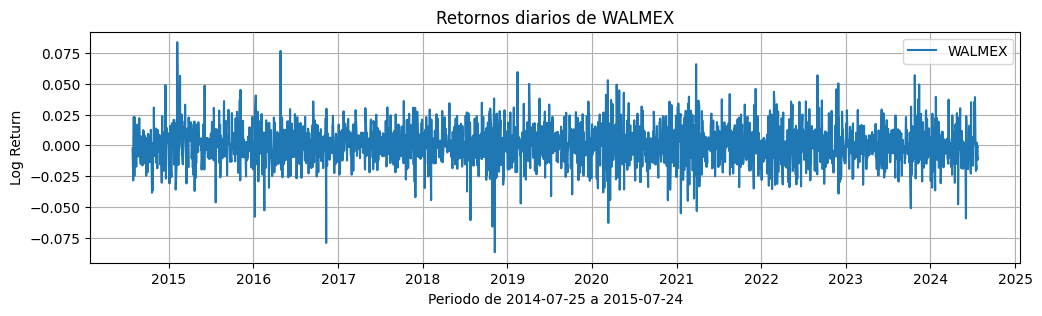

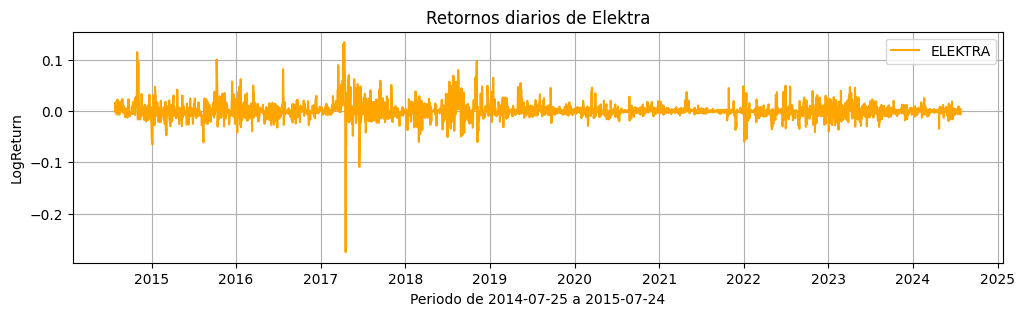

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para df_walmex
plt.figure(figsize=(12, 3))  # Ajustar el tamaño de la figura
plt.plot(df_walmex['Return'], label='WALMEX')
plt.title('Retornos diarios de WALMEX')
plt.xlabel(f'Periodo de {df_walmex.index[0]} a {df_walmex.index[250]}')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()
print(" ")

# Gráfico para df_elektra
plt.figure(figsize=(12, 3))  # Ajustar el tamaño de la figura
plt.plot(df_elektra['Return'], label='ELEKTRA', color='orange')
plt.title('Retornos diarios de Elektra')
plt.xlabel(f'Periodo de {df_elektra.index[0]} a {df_elektra.index[250]}')
plt.ylabel('LogReturn')
plt.legend()
plt.grid(True)
plt.show()

### Gráficas en *Python* con *seaborn*

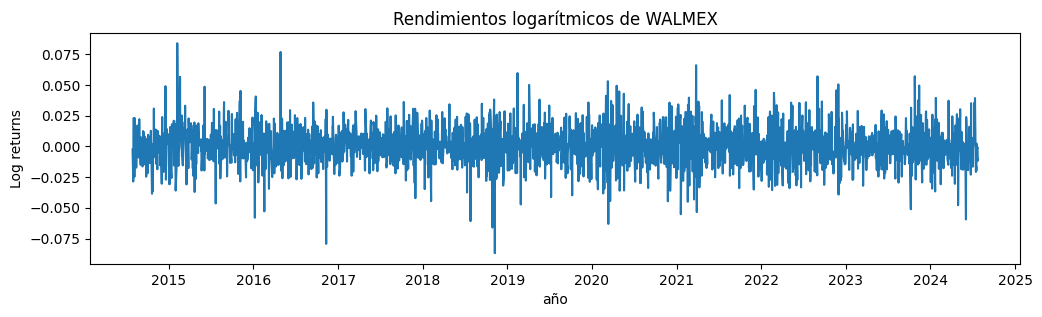

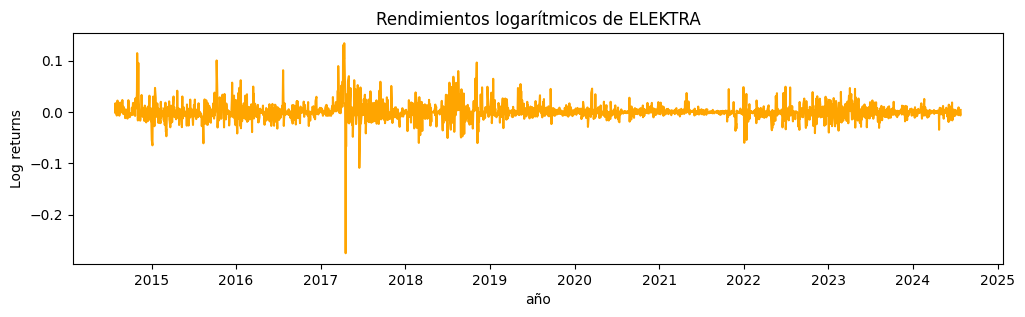

In [ ]:
import seaborn as sns

# Visualizar los retornos logarítmicos
plt.figure(figsize=(12, 3))
sns.lineplot(df_walmex['Return'] )
plt.title('Rendimientos logarítmicos de WALMEX')
plt.xlabel('año')
plt.ylabel('Log returns')
plt.show()
print(" ")

plt.figure(figsize=(12, 3))
sns.lineplot(df_elektra['Return'], color='orange' )
plt.title('Rendimientos logarítmicos de ELEKTRA')
plt.xlabel('año')
plt.ylabel('Log returns')
plt.show()

Guardamos las bases de datos para poder usaarlas en *R*

In [ ]:
df_walmex.to_csv('/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_walmex.csv')
df_elektra.to_csv('/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_elektra.csv')

### Gráficas en *R* con *plot*

Veamos las gráficas de *Ecdat* descritas en el libro de texto.

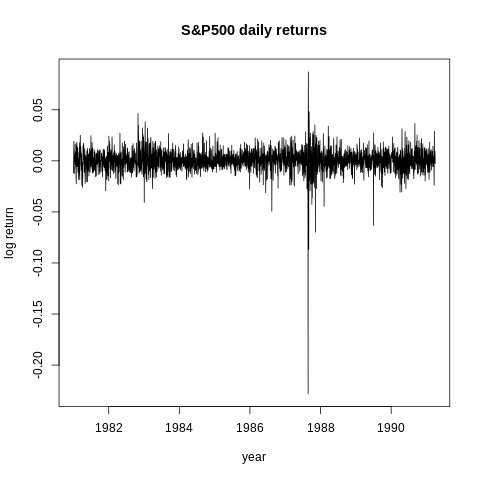

In [ ]:
%%R
SPreturn = SP500$r500
n = length(SPreturn)
year_SP = 1981 + (1:n)*(1991.25 - 1981)/n
plot(year_SP, SPreturn, main = "S&P500 daily returns",
xlab = "year", type = "l", ylab = "log return")

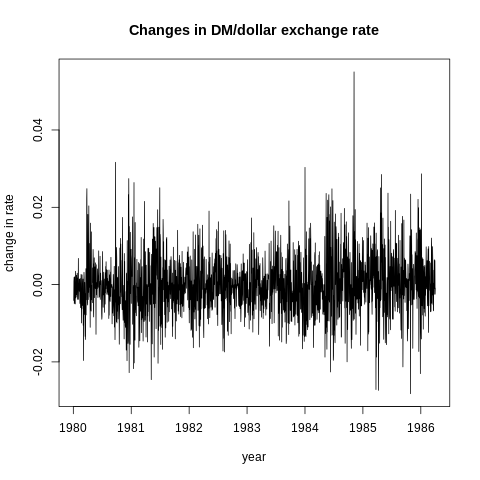

In [ ]:
%%R
ddm = Garch$ddm
n = length(ddm)
year_ddm = 1980 + (1:n)*(1986.25 - 1980)/n
plot(year_ddm, ddm, main = "Changes in DM/dollar exchange rate",
xlab = "year", type = "l", ylab = "change in rate")

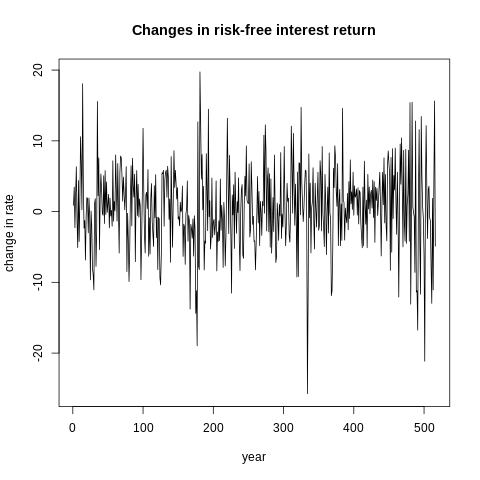

In [ ]:
%%R
rf = Capm$rdur
#n = length(dm)
#year_rf = 0 + (1:n)*(516 - 0)/n
plot(rf, main = "Changes in risk-free interest return",
xlab = "year", type = "l", ylab = "change in rate")

Leemos los datos de WALMEX y ELEKTRA para usarlos en *R*

In [ ]:
%R df_walmex <- read.csv("/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_walmex.csv")
%R df_elektra <- read.csv("/content/drive/MyDrive/Colab Notebooks/Finance/Análisis exploratorio de datos/df_elektra.csv")

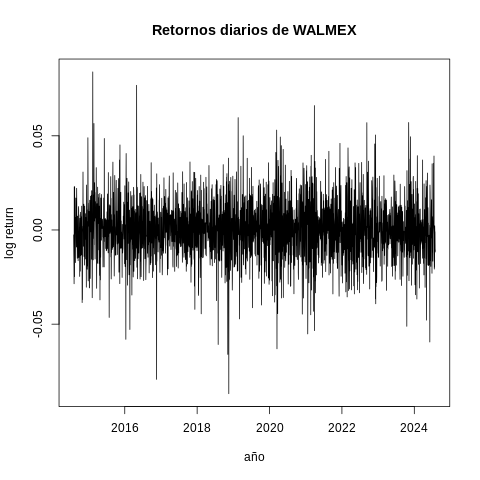

In [ ]:
%%R
WMreturn <- df_walmex$Return
n = length(WMreturn)
year_WM <- 2014.58 + (1:n)*(2024.58-2014.58)/n
plot(year_WM, WMreturn, main = "Retornos diarios de WALMEX" ,
xlab = "año", type = "l", ylab = "log return")

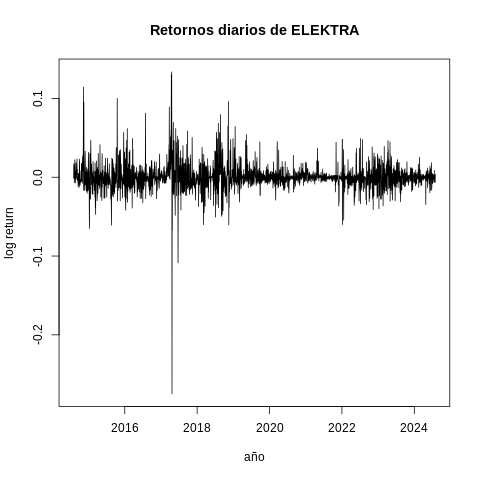

In [ ]:
%%R
EMreturn <- df_elektra$Return
n = length(EMreturn)
year_EM <- 2014.58 + (1:n)*(2024.58-2014.58)/n
plot(year_EM, EMreturn, main = "Retornos diarios de ELEKTRA",
xlab = "año", type = "l", ylab = "log return")

### Gráficas en *R* con *ggplot2*

In [ ]:
%%R
install.packages("ggplot2")
library(ggplot2)

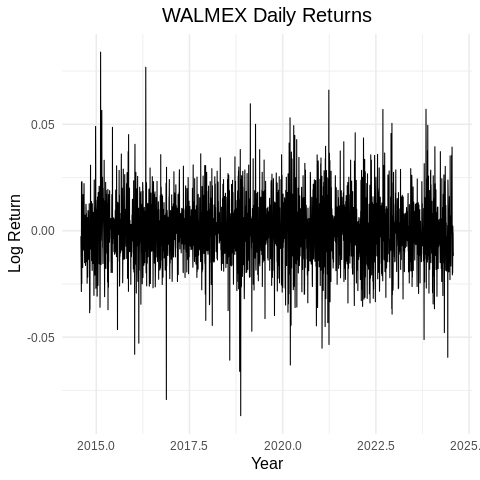

In [ ]:
%%R
# Crear un DataFrame con los datos
data <- data.frame(
  year_WM = year_WM,
  WMreturn = WMreturn
)
# Crear el gráfico usando ggplot2
ggplot(data, aes(x = year_WM, y = WMreturn)) + geom_line() +
  labs(title = "WALMEX Daily Returns",x = "Year",y = "Log Return") +
  theme_minimal(base_size = 16) + # Ajustar el tamaño del texto y elementos del gráfico
  theme(
    plot.title = element_text(size = 20, hjust = 0.5), # Tamaño del título
    axis.title.x = element_text(size = 16), # Tamaño del título del eje x
    axis.title.y = element_text(size = 16), # Tamaño del título del eje y
    axis.text = element_text(size = 12) # Tamaño del texto de los ejes
  )

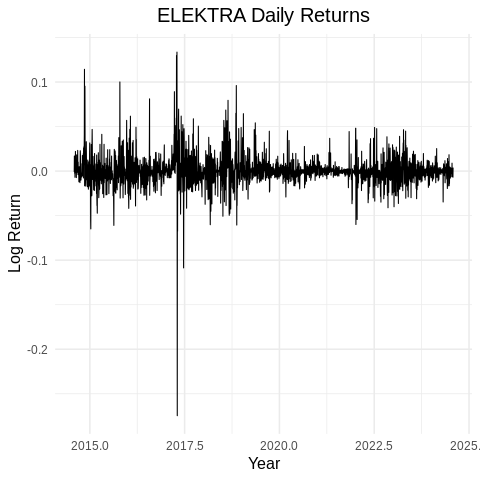

In [ ]:
%%R
# Crear un DataFrame con los datos
data <- data.frame(
  year_EM = year_EM,
  EMreturn = EMreturn
)
# Crear el gráfico usando ggplot2
ggplot(data, aes(x = year_EM, y = EMreturn)) + geom_line() +
  labs(title = "ELEKTRA Daily Returns",x = "Year",y = "Log Return") +
  theme_minimal(base_size = 16) + # Ajustar el tamaño del texto y elementos del gráfico
  theme(
    plot.title = element_text(size = 20, hjust = 0.5), # Tamaño del título
    axis.title.x = element_text(size = 16), # Tamaño del título del eje x
    axis.title.y = element_text(size = 16), # Tamaño del título del eje y
    axis.text = element_text(size = 12) # Tamaño del texto de los ejes
  )

## Histogramas

El *histograma* es un estimador simple (burdo) de funciones de densidad de probabilidad (PDF).

Los valores atípicos son difíciles, o quizás imposibles, de ver en el histograma. Cuando el tamaño de la muestra es muy grande, una celda con una frecuencia pequeña es esencialmente invisible.



### En *R* con *hist*

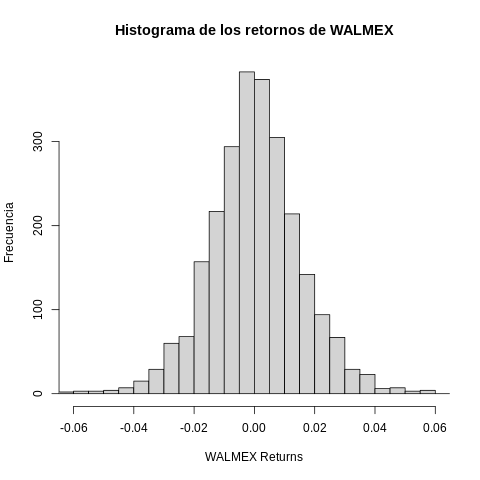

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [ ]:
%R hist(WMreturn, breaks=50, xlim = c(-0.06, 0.06), fill = "blue", main="Histograma de los retornos de WALMEX", xlab="WALMEX Returns",ylab="Frecuencia")

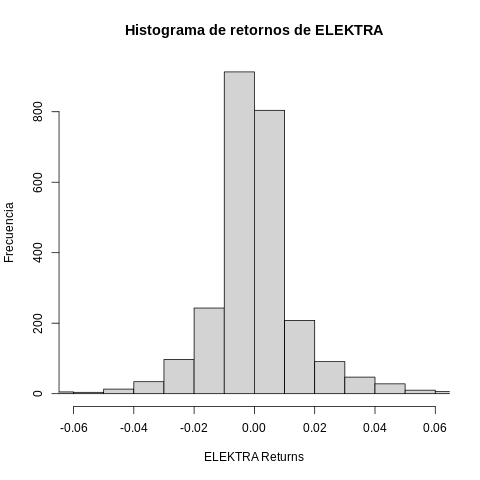

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [ ]:
%R hist(EMreturn, breaks=50, xlim = c(-0.06, 0.06), main="Histograma de retornos de ELEKTRA", xlab="ELEKTRA Returns",ylab="Frecuencia")

### En *R* con *ggplot*

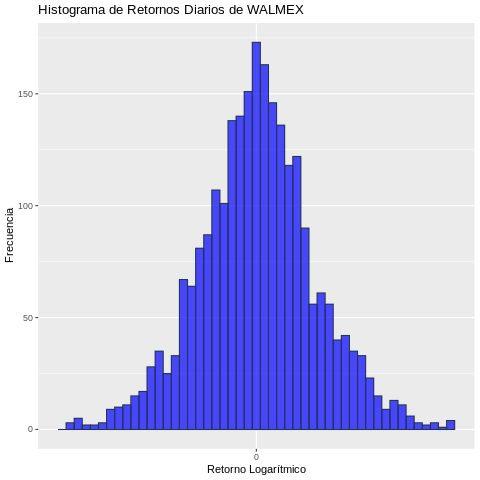

In [ ]:
%%R
ggplot(data, aes(x = WMreturn)) +
  geom_histogram(bins = 50, fill = "blue", colour = "#1F3552", alpha = 0.7) +
  labs(title = "Histograma de Retornos Diarios de WALMEX") +
       scale_x_continuous(name = "Retorno Logarítmico",
                           breaks = seq(0, 175, 25),
                           limits=c(-0.05, 0.05)) +
        scale_y_continuous(name = "Frecuencia")

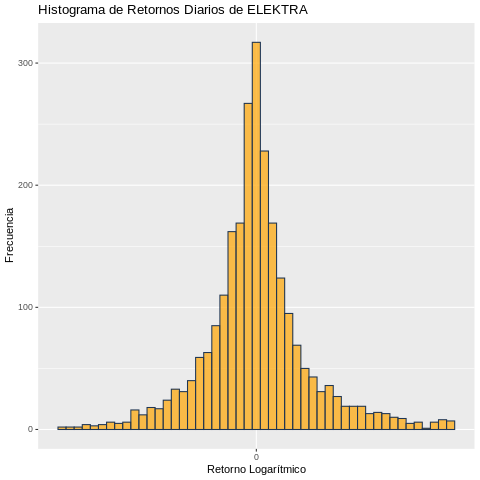

In [ ]:
%%R
ggplot(data, aes(x = EMreturn)) +
  geom_histogram(bins = 50, fill = "orange", colour = "#1F3552", alpha = 0.7) +
  labs(title = "Histograma de Retornos Diarios de ELEKTRA") +
       scale_x_continuous(name = "Retorno Logarítmico",
                           breaks = seq(0, 175, 25),
                           limits=c(-0.05, 0.05)) +
        scale_y_continuous(name = "Frecuencia")

### En *Python* con *histplot* de *seaborn*

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

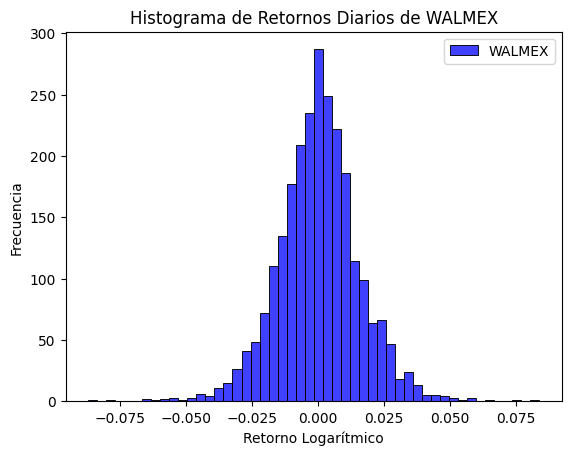

In [ ]:
sns.histplot(df_walmex['Return'], bins=50, color='blue', label='WALMEX')
plt.title('Histograma de Retornos Diarios de WALMEX')
plt.xlabel('Retorno Logarítmico')
plt.ylabel('Frecuencia')
plt.legend()
plt

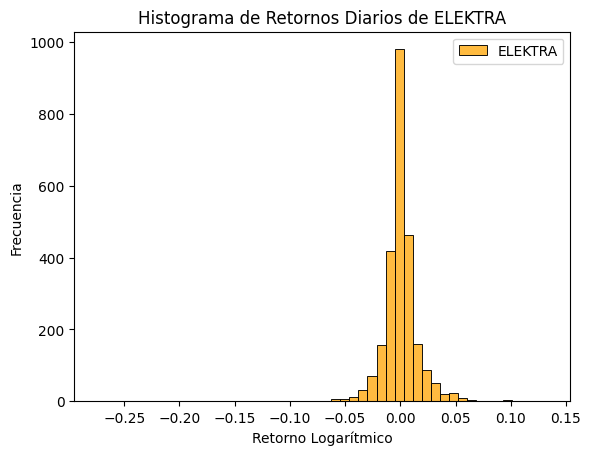

In [ ]:
sns.histplot(df_elektra['Return'], bins=50, color='orange', label='ELEKTRA')
plt.title('Histograma de Retornos Diarios de ELEKTRA')
plt.xlabel('Retorno Logarítmico')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Estimador de densidad de núcleo (KDE)

El *estimador de densidad de núcleo* (KDE) es una técnica no paramétrica para estimar la función de densidad de probabilidad de una variable aleatoria (PDF). Es una alternativa a los histogramas para representar la distribución de datos de manera más suave y continua.


* *Kernel:* Es una función suave y simétrica que se centra en cada punto de datos y se extiende a su alrededor.
* *Ancho de Banda (Bandwidth)*: Determina el ancho de las funciones kernel. Un ancho de banda más pequeño captura más detalles de la distribución, mientras que uno más grande proporciona una curva más suave.
* *Estimación*: La estimación de densidad se obtiene sumando todas las funciones kernel centradas en cada punto de datos.

* La fórmula del estimador de densidad de núcleo (KDE) de $\{Y_1,...,Y_n\}$ es
$$
\hat{f}(y) = \frac{1}{n b} \sum_{i=1}^{n} K\left(\frac{y - Y_i}{b}\right)
$$
donde:
  * $\hat{f}(y)$ es la estimación de la densidad en el punto $y$.
  * $n$ es el número de puntos de datos.
  * $b$ es el ancho de banda.
  * $K(\cdot)$ es la función kernel K(⋅), que generalmente es una función simétrica e integrable, como la función gaussiana.

* El *sesgo* del estimador de densidad del kernel aumenta con el aumento del ancho de banda $b$. Un valor grande de $b$ produce una estimación más suave y con menor variabilidad, pero puede no capturar los detalles de la distribución subyacente, lo que resulta en un alto sesgo.
* La *varianza* del estimador de densidad del kernel disminuye con el aumento del ancho de banda
$b$. Un valor pequeño de $b$ produce una estimación que sigue de cerca los datos de muestra, lo que resulta en una baja varianza pero puede llevar a un ajuste excesivo y a una estimación ruidosa.



### Sesgo y Varianza en Estadística

En estadística, el $\textbf{sesgo}$ y la $\textbf{varianza}$ son conceptos fundamentales para evaluar la calidad de los estimadores.

El *sesgo* de un estimador $\hat{\theta}$ de un parámetro $\theta$ es la diferencia entre el valor esperado del estimador y el verdadero valor del parámetro:

$$
\text{Sesgo}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta
$$

La *varianza* de un estimador $\hat{\theta}$ mide la variabilidad de las estimaciones alrededor de su valor esperado:

$$
\text{Varianza}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2]
$$

El *error cuadrático medio* (MSE) de un estimador $\hat{\theta}$ es una medida de la calidad del estimador que combina el sesgo y la varianza:

$$
\text{MSE}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2]
$$

El MSE se puede descomponer en sesgo y varianza:

$$
\text{MSE}(\hat{\theta}) = \text{Varianza}(\hat{\theta}) + (\text{Sesgo}(\hat{\theta}))^2
$$

### KDE con *R* usando *density*

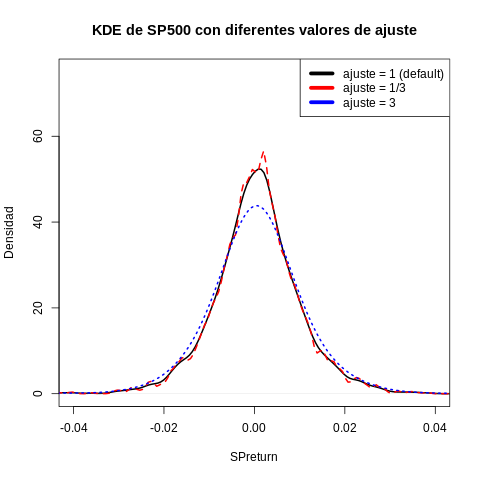

In [ ]:
%%R
kde_default <- density(SPreturn)
kde_adjust_1_3 <- density(SPreturn, adjust = 1/3)
kde_adjust_3 <- density(SPreturn, adjust = 3)

plot(kde_default, main = "KDE de SP500 con diferentes valores de ajuste", ylim = c(0,75),
     xlab = "SPreturn", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

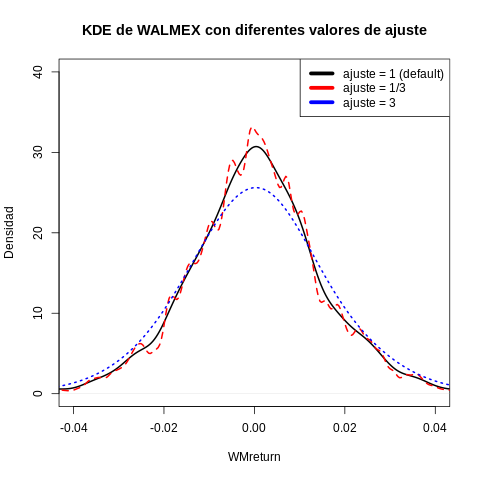

In [ ]:
%%R
WMreturn <- na.omit(WMreturn)
WM_kde_default <- density(WMreturn)
WM_kde_adjust_1_3 <- density(WMreturn, adjust = 1/3)
WM_kde_adjust_3 <- density(WMreturn, adjust = 3)

plot(WM_kde_default, main = "KDE de WALMEX con diferentes valores de ajuste", ylim = c(0,40),
     xlab = "WMreturn", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(WM_kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(WM_kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

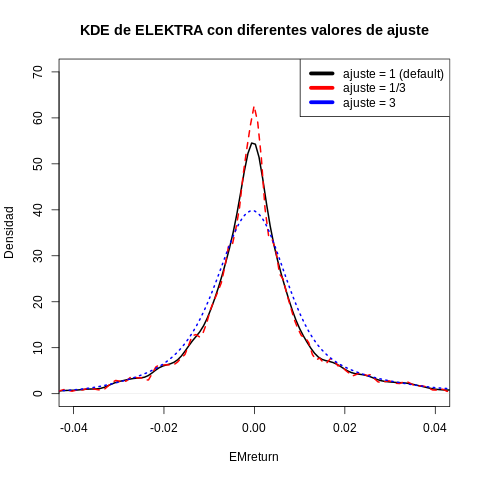

In [ ]:
%%R
EMreturn <- na.omit(EMreturn)
EM_kde_default <- density(EMreturn)
EM_kde_adjust_1_3 <- density(EMreturn, adjust = 1/3)
EM_kde_adjust_3 <- density(EMreturn, adjust = 3)

plot(EM_kde_default, main = "KDE de ELEKTRA con diferentes valores de ajuste", ylim = c(0,70),
     xlab = "EMreturn", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04),lty=1)
lines(EM_kde_adjust_1_3, col = "red", lwd = 2, lty=2)
lines(EM_kde_adjust_3, col = "blue", lwd = 2, lty=3)

legend("topright", legend = c("ajuste = 1 (default)", "ajuste = 1/3", "ajuste = 3"),
       col = c("black", "red", "blue"), lwd = 5)

En general podemos observar que:

* La curva discontinua (roja) correspondiente a ajustar = 1/3 se mueve, lo que indica demasiada variabilidad aleatoria; tal curva se llama subsuavizada y *sobreajustada*.

* La curva de puntos (azul) es muy suave pero subestima el pico cercano a $0$, una señal de sesgo. Esta curva se denomina sobresuavizada o *subajustada*.

* Generalmente, el ajuste estará mucho más cerca de 1

* A menudo se utiliza una estimación de la densidad del núcleo para sugerir un modelo estadístico paramétrico.

* Aunque es sencillo de calcular, KDE tiene algunos problemas. En particular, suele tener demasiados baches en las colas.



### KDE en *Python* usando *kdeplot*

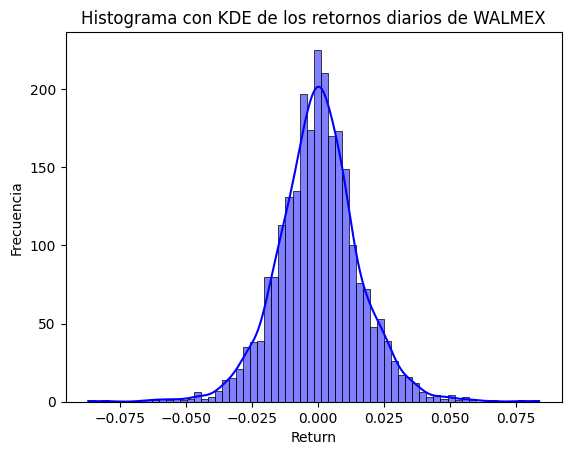

In [ ]:
sns.histplot(data=df_walmex, x='Return', kde = True, color='blue')
plt.title('Histograma con KDE de los retornos diarios de WALMEX')
plt.xlabel('Return')
plt.ylabel('Frecuencia')
plt.show()

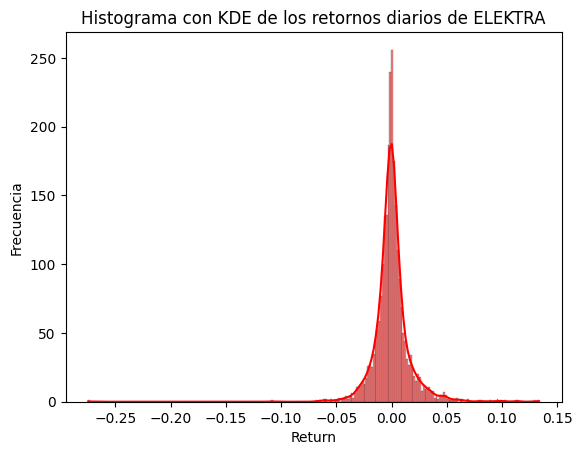

In [ ]:
sns.histplot(data=df_elektra, x='Return', kde = True, color='red')
plt.title('Histograma con KDE de los retornos diarios de ELEKTRA')
plt.xlabel('Return')
plt.ylabel('Frecuencia')
plt.show()

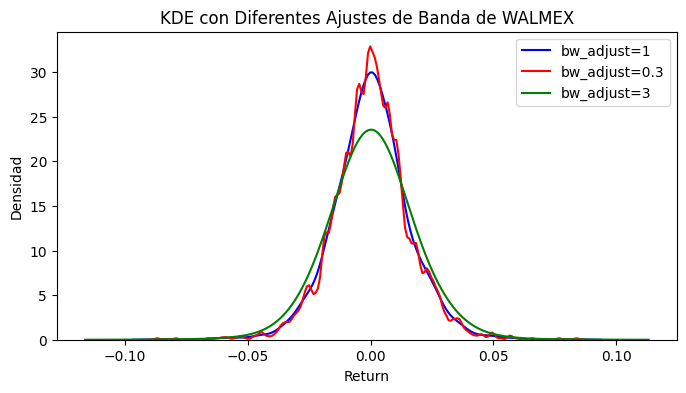

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 4))

# Gráfico de densidad con bw_adjust=1
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=1, label='bw_adjust=1', color='blue',)

# Gráfico de densidad con bw_adjust=0.3
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=0.3, label='bw_adjust=0.3', color='red')

# Gráfico de densidad con bw_adjust=3
sns.kdeplot(data=df_walmex, x='Return', bw_adjust=3, label='bw_adjust=3', color='green')

# Añadir título y etiquetas
plt.title('KDE con Diferentes Ajustes de Banda de WALMEX')
plt.xlabel('Return')
plt.ylabel('Densidad')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

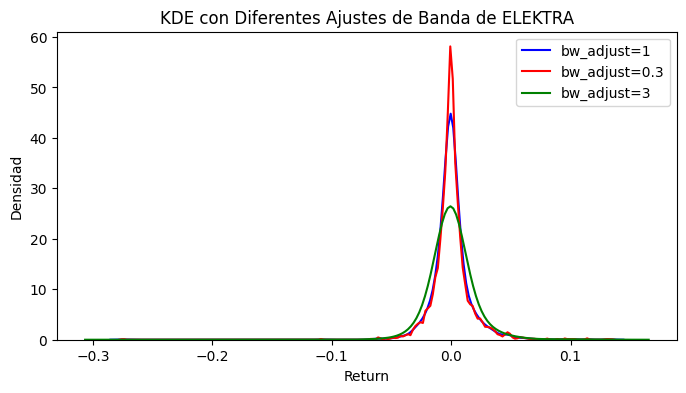

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 4))

# Gráfico de densidad con bw_adjust=1
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=1, label='bw_adjust=1', color='blue',)

# Gráfico de densidad con bw_adjust=0.3
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=0.3, label='bw_adjust=0.3', color='red')

# Gráfico de densidad con bw_adjust=3
sns.kdeplot(data=df_elektra, x='Return', bw_adjust=3, label='bw_adjust=3', color='green')

# Añadir título y etiquetas
plt.title('KDE con Diferentes Ajustes de Banda de ELEKTRA')
plt.xlabel('Return')
plt.ylabel('Densidad')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

### KDE vs distribución normal

Veamos el comparativo entre KDE con ajuste igual a 1 y la distribución normal

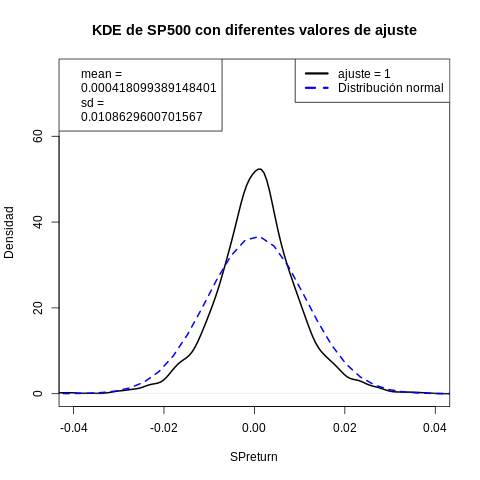

In [ ]:
%%R
kde_default <- density(SPreturn,adjust=1)

# Parámetros de la distribución normal teórica
mean_SP <- mean(SPreturn)
sd_SP <- sd(SPreturn)
x <- seq(min(SPreturn), max(SPreturn), length.out = 100)
y <- dnorm(x, mean = mean_SP, sd = sd_SP)

plot(kde_default, main = "KDE de SP500 con diferentes valores de ajuste", ylim = c(0,75),
     xlab = "SPreturn", ylab = "Densidad", col = "black", lwd = 2, xlim = c(-0.04, 0.04))
lines(x, y, col = "blue", lwd = 2, lty = 2)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("black", "blue"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_SP, "sd =", sd_SP))

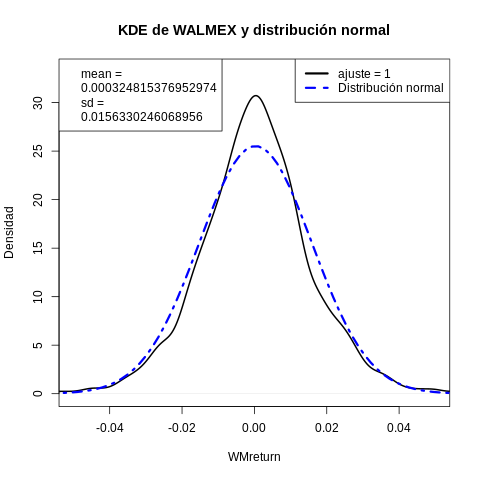

In [ ]:
%%R
# Estimación de densidad del kernel con diferentes ajustes
WM_kde_default <- density(WMreturn,adjust = 1)

# Parámetros de la distribución normal teórica
mean_WM <- mean(WMreturn)
sd_WM <- sd(WMreturn)
x <- seq(min(WMreturn), max(WMreturn), length.out = 100)
y <- dnorm(x, mean = mean_WM, sd = sd_WM)

# Graficar KDE y distribución normal
plot(WM_kde_default, main = "KDE de WALMEX y distribución normal",
     ylim = range(0, max(WM_kde_default$y, WM_kde_adjust_1_3$y, WM_kde_adjust_3$y, y)),
     xlab = "WMreturn", ylab = "Densidad", col = "black", lwd = 2, xlim =c(-0.05,0.05), lty = 1)
lines(x, y, col = "blue", lwd = 3, lty = 4)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("black", "blue"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_WM, "sd =", sd_WM))

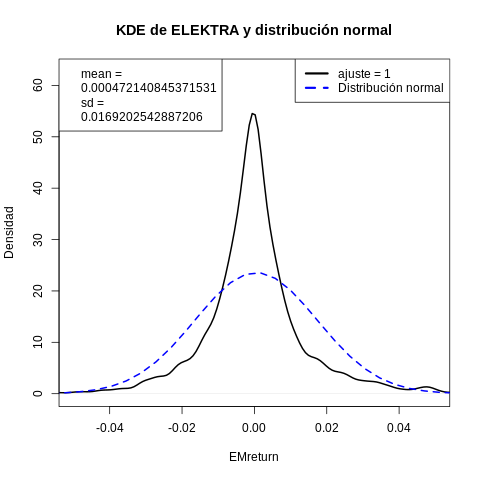

In [ ]:
%%R
# Estimación de densidad del kernel con diferentes ajustes
EM_kde_default <- density(EMreturn,adjust=1)

# Parámetros de la distribución normal teórica
mean_EM <- mean(EMreturn)
sd_EM <- sd(EMreturn)
x <- seq(min(EMreturn), max(EMreturn), length.out = 100)
y <- dnorm(x, mean = mean_EM, sd = sd_EM)

# Graficar KDE y distribución normal
plot(EM_kde_default, main = "KDE de ELEKTRA y distribución normal",
     ylim = range(0, max(EM_kde_default$y, EM_kde_adjust_1_3$y, EM_kde_adjust_3$y, y)),
     xlab = "EMreturn", ylab = "Densidad", col = "black", lwd = 2, xlim =c(-0.05,0.05), lty = 1)
lines(x, y, col = "blue", lwd = 2, lty = 2)  # Agregar distribución normal

# Leyenda
legend("topright", legend = c("ajuste = 1", "Distribución normal"),
       col = c("black", "blue"), lwd = 3, lty = c(1, 2))
legend("topleft", legend = c("mean =", mean_EM, "sd =", sd_EM))

En general, se puede obervar que la KDE y la densidad normal son diferentes. La razón es que los rendimientos atípicos inflan la desviación estándar de la muestra y hacen que la densidad normal ajustada esté demasiado dispersa en el medio de los datos.

### Desviación media absoluta (MAD)

La desviación media absoluta es una medida robusta de la dispersión estadística. Es particularmente útil para identificar valores atípicos en un conjunto de datos y para obtener estadísticas sólidas, ya que es menos sensible a los valores atípicos que la desviación estándar.

Para calcular la MAD, se siguen los siguientes pasos:
* Calcular la mediana del conjunto de datos.
* Calcular las desviaciones absolutas respecto a la mediana.
* Calcular la mediana de estas desviaciones absolutas.

La fórmula para el estimador MAD es:

$$
\text{MAD} = \text{mediana}(|X_i - \text{mediana}(X)|)
$$

donde $X_i$ representa los elementos del conjunto de datos.

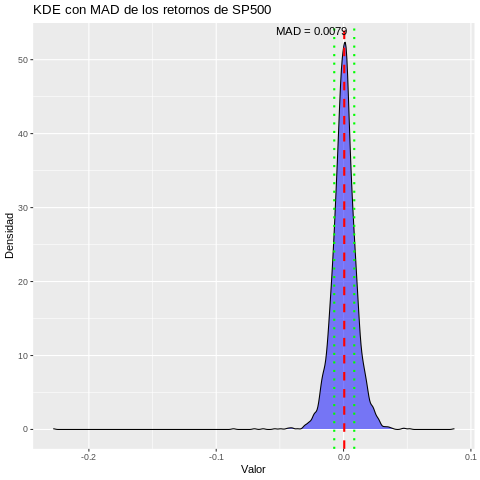

In [ ]:
%%R
# Calcula la MAD
mad_value <- mad(SPreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
SPreturn_df <- data.frame(SPreturn = SPreturn)

# Grafica KDE con las líneas de la mediana y MAD
library(ggplot2)

ggplot(SPreturn_df, aes(x = SPreturn)) +
  geom_density(fill = "blue", alpha = 0.5) +
  geom_vline(xintercept = median(SPreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(SPreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(SPreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de SP500",
       x = "Valor", y = "Densidad") +
  annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

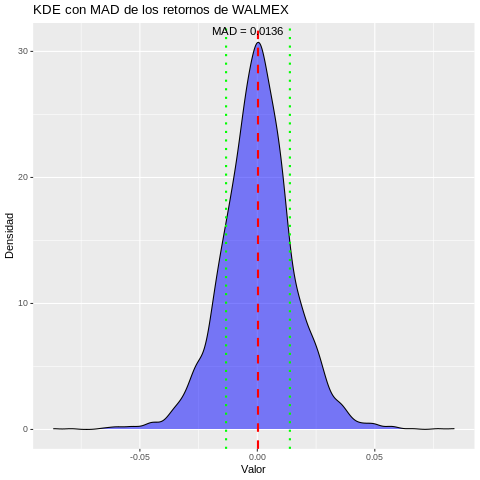

In [ ]:
%%R
# Calcula la MAD
mad_value <- mad(WMreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
WMreturn_df <- data.frame(WMreturn = WMreturn)

# Grafica KDE con las líneas de la mediana y MAD
ggplot(WMreturn_df, aes(x = WMreturn)) +
  geom_density(fill = "blue", alpha = 0.5) +
  geom_vline(xintercept = median(WMreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(WMreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(WMreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de WALMEX",
       x = "Valor", y = "Densidad") +
    annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

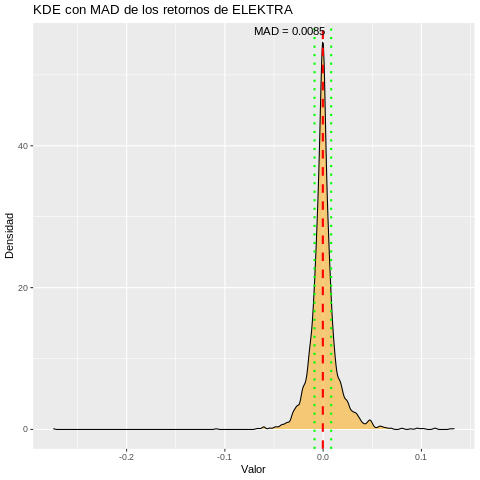

In [ ]:
%%R
# Calcula la MAD
mad_value <- mad(EMreturn)

# Convierte SPreturn a un data frame para usarlo con ggplot
EMreturn_df <- data.frame(EMreturn = EMreturn)

# Grafica KDE con las líneas de la mediana y MAD
ggplot(EMreturn_df, aes(x = EMreturn)) +
  geom_density(fill = "orange", alpha = 0.5) +
  geom_vline(xintercept = median(EMreturn), color = "red", linetype = "dashed", size = 1) +
  geom_vline(xintercept = median(EMreturn) + mad_value, color = "green", linetype = "dotted", size = 1) +
  geom_vline(xintercept = median(EMreturn) - mad_value, color = "green", linetype = "dotted", size = 1) +
  labs(title = "KDE con MAD de los retornos de ELEKTRA",
       x = "Valor", y = "Densidad") +
    annotate("text", x = median(SPreturn) + mad_value, y = Inf, label = paste("MAD =", round(mad_value, 4)), vjust = 1.5, hjust = 1.1, color = "black", size = 4)

Even the normal density in panel shows some deviation from the kernel estimator, and, as we will soon see, the t-distribution provides a better model for the return distribution than does the normal distribution.

The need for robust estimators is itself a sign
of nonnormality.

We have just seen a problem with using a KDE to suggest a good model for the distribution of the data in a sample—the parameters in the model must be
 stimated properly. Normal probability plots and, more generally, quantile–quantile plots, which will be discussed in Sects. 4.3.2 and 4.3.4, are better methods for comparing a sample with a theoretical distribution.

Though simple to compute, the KDE has some problems. In particular, it is often too bumpy in the tails. An improvement to the KDE is discussed in

## Estadísticas de orden, CDF de muestra y cuantiles de muestra